# About the data

---
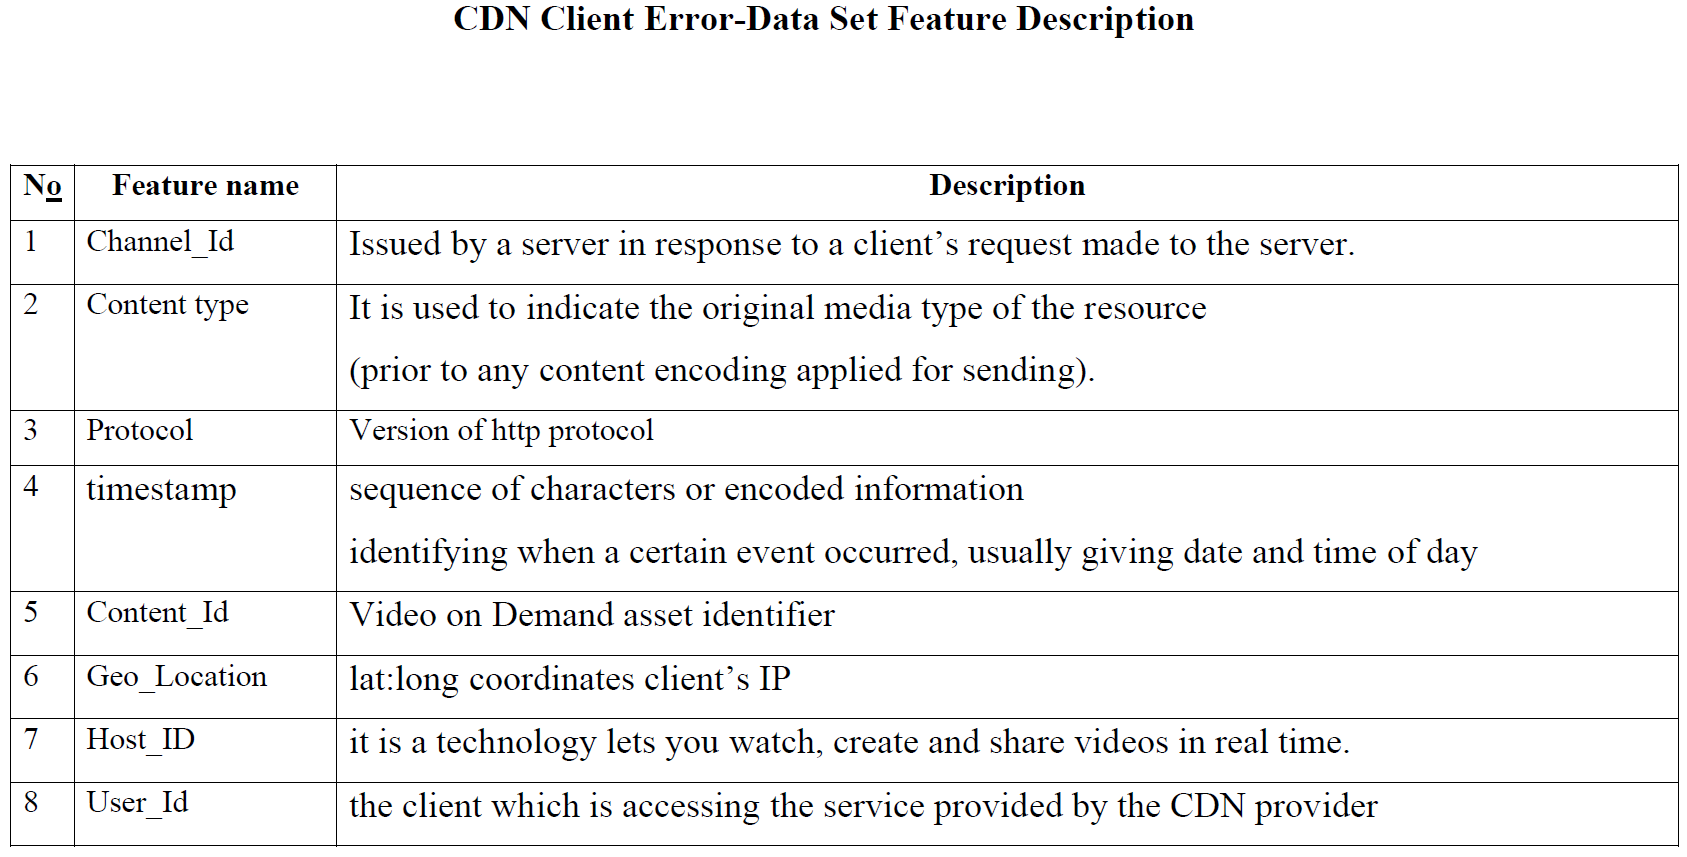

# Import Libraries

We first import the libraries that we will use in the notebook.

In [2]:
!pip install hdbscan
import pandas as pd # For dataframe manipulation
import numpy as np # For arrays and matrices manipulation

# For hdbscan modeling 
import hdbscan

# For plotting charts and diagrams
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from IPython.display import display

# For general use
from random import *
from google.colab import files

# Data loading

We first import the dataset and create the pandas dataframe.



### Training dataset

In [2]:
df_train = files.upload()

Saving train_cdn.csv to train_cdn.csv


In [3]:
df_train = pd.read_csv("train_cdn.csv").drop(columns=['timestamp']).fillna(-1)

In [4]:
df_train.head()

,channel_id,host_id,content_type,protocol,content_id,geo_location,user_id
0,0,156,2,1,-1.0,1,13.0
1,0,156,2,1,-1.0,802,13.0
2,2,123,4,1,-1.0,556,7.0
3,0,156,2,1,-1.0,1,13.0
4,0,1,8,1,-1.0,1,1.0


### Testing dataset

In [5]:
df_test = files.upload()

Saving test_cdn.csv to test_cdn.csv


In [39]:
df_test = pd.read_csv("test_cdn.csv").drop(columns=['timestamp']).fillna(-1)

# HDBSCAN

**HDBSCAN extends DBSCAN** by converting it into a hierarchical clustering algorithm, and then using a technique to extract a flat clustering based in the stability of clusters.

As opposed to DBSCAN, HDBSCAN is a good algorithm to use **for real-time incoming data** because it allows to classify one single point on-the-fly after having trained the model (while DBSCAN requires to run the computations on every samples in order to cluster all of them).

## Test and definition of the parameters

To tune our HDBSCAN model as best as possible we will test the results with different values of epsilon and min_samples.

### Using min_samples=500

In [50]:
list_eps = range(1,10)
for eps in list_eps:
  eps/=10
  print("Epsilon = ", eps)
  model = hdbscan.HDBSCAN(metric='hamming', min_samples=500, cluster_selection_epsilon=eps)
  model.fit(df_train)
  print("Noise points: ", list(model.labels_).count(-1))
  print("Number of clusters", model.labels_.max(), "\n\n")

Epsilon =  0.1
Noise points:  21604
Number of clusters 32 


Epsilon =  0.2
Noise points:  13947
Number of clusters 18 


Epsilon =  0.3
Noise points:  9349
Number of clusters 12 


Epsilon =  0.4
Noise points:  9349
Number of clusters 12 


Epsilon =  0.5
Noise points:  9349
Number of clusters 12 


Epsilon =  0.6
Noise points:  557
Number of clusters 1 


Epsilon =  0.7
Noise points:  557
Number of clusters 1 


Epsilon =  0.8
Noise points:  557
Number of clusters 1 


Epsilon =  0.9
Noise points:  557
Number of clusters 1 




### Using min_samples=1000

In [49]:
list_eps = range(1,10)
for eps in list_eps:
  eps/=10
  print("Epsilon = ", eps)
  model = hdbscan.HDBSCAN(metric='hamming', min_samples=1000, cluster_selection_epsilon=eps)
  model.fit(df_train)
  print("Noise points: ", list(model.labels_).count(-1))
  print("Number of clusters", model.labels_.max(), "\n\n")

Epsilon =  0.1
Noise points:  20101
Number of clusters 34 


Epsilon =  0.2
Noise points:  13647
Number of clusters 12 


Epsilon =  0.3
Noise points:  9662
Number of clusters 6 


Epsilon =  0.4
Noise points:  9662
Number of clusters 6 


Epsilon =  0.5
Noise points:  8335
Number of clusters 5 


Epsilon =  0.6
Noise points:  1170
Number of clusters 1 


Epsilon =  0.7
Noise points:  1170
Number of clusters 1 


Epsilon =  0.8
Noise points:  1170
Number of clusters 1 


Epsilon =  0.9
Noise points:  1170
Number of clusters 1 




### Using min_samples=2000

In [5]:
list_eps = range(1,10)
for eps in list_eps:
  eps/=10
  print("Epsilon = ", eps)
  model = hdbscan.HDBSCAN(metric='hamming', min_samples=2000, cluster_selection_epsilon=eps)
  model.fit(df_train)
  print("Noise points: ", list(model.labels_).count(-1))
  print("Number of clusters", model.labels_.max(), "\n\n")

Epsilon =  0.1
Noise points:  11515
Number of clusters 11 


Epsilon =  0.2
Noise points:  9539
Number of clusters 9 


Epsilon =  0.3
Noise points:  10135
Number of clusters 4 


Epsilon =  0.4
Noise points:  10135
Number of clusters 4 


Epsilon =  0.5
Noise points:  7684
Number of clusters 3 


Epsilon =  0.6
Noise points:  1361
Number of clusters 1 


Epsilon =  0.7
Noise points:  1361
Number of clusters 1 


Epsilon =  0.8
Noise points:  1361
Number of clusters 1 


Epsilon =  0.9
Noise points:  1361
Number of clusters 1 




### Using min_samples=4000

In [7]:
list_eps = range(1,10)
for eps in list_eps:
  eps/=10
  print("Epsilon = ", eps)
  model = hdbscan.HDBSCAN(metric='hamming', min_samples=4000, cluster_selection_epsilon=eps)
  model.fit(df_train)
  print("Noise points: ", list(model.labels_).count(-1))
  print("Number of clusters", model.labels_.max(), "\n\n")

Epsilon =  0.1
Noise points:  16596
Number of clusters 7 


Epsilon =  0.2
Noise points:  16596
Number of clusters 7 


Epsilon =  0.3
Noise points:  9961
Number of clusters 4 


Epsilon =  0.4
Noise points:  9961
Number of clusters 4 


Epsilon =  0.5
Noise points:  7819
Number of clusters 2 


Epsilon =  0.6
Noise points:  1888
Number of clusters 1 


Epsilon =  0.7
Noise points:  1888
Number of clusters 1 


Epsilon =  0.8
Noise points:  1888
Number of clusters 1 


Epsilon =  0.9
Noise points:  1888
Number of clusters 1 




## HDBSCAN training

In [8]:
model = hdbscan.HDBSCAN(metric="hamming", min_samples=2000, cluster_selection_epsilon=0.5, prediction_data=True)
model.fit(df_train)
print("Noise points: ", list(model.labels_).count(-1))
print("Number of clusters", model.labels_.max(), "\n\n")

Noise points:  7684
Number of clusters 3 




### Visualization of HDBSCAN training clustering

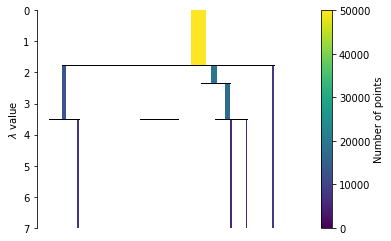

In [9]:
model.condensed_tree_.plot()

/usr/local/lib/python3.7/dist-packages/hdbscan/plots.py:383: UserWarning: Infinite lambda values encountered in chosen clusters. This might be due to duplicates in the data.
  warn('Infinite lambda values encountered in chosen clusters.'


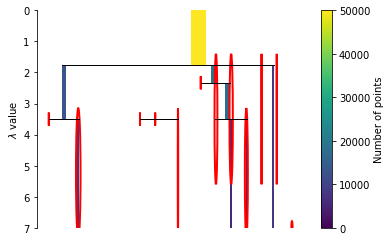

In [16]:
model.condensed_tree_.plot(select_clusters=True)

In [58]:
import plotly.express as px
# Sort the dataframe so clusters in the legend follow the number order
df_visualization=df_train.copy()
df_visualization['HDBSCAN Clusters']=model.labels_
df_visualization=df_visualization.sort_values(by=['HDBSCAN Clusters'])

# Create a 3D scatter plot
fig = px.scatter_3d(df_visualization, x=df_visualization['channel_id'], y=df_visualization['content_type'], z=df_visualization['host_id'], 
                    opacity=1, color=model.labels_.astype(str), 
                    color_discrete_sequence=['black']+px.colors.qualitative.Plotly,
                    width=900, height=900
                   )

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="bottom", y=0.04, xanchor="left", x=0.1),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))
# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

### Outliner scores

The hdbscan library supports the GLOSH outlier detection algorithm, and does so within the HDBSCAN clustering class. It is a fast and flexible outlier detection system, and supports a notion of local outliers. This means that it can detect outliers that may be noticeably different from points in its local region (for example points not on a local submanifold) but that are not necessarily outliers globally. In our practical case this could be good to detect anomalies even if it comes from the same user_id for example. The following plotting represents the distribution of the outline scores in the training dataset. A score equal close to 0 means that it is not detected as an outliner. At the oppoite a score closer to 1 indicates an outliner detection.

/usr/local/lib/python3.7/dist-packages/hdbscan/hdbscan_.py:1052: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



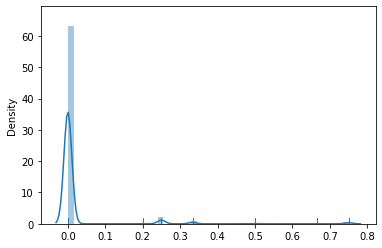

In [18]:
sns.distplot(model.outlier_scores_[np.isfinite(model.outlier_scores_)], rug=True)

## HDBSCAN predictions

In our practical case we want to train our model once on a large amount of data, and then query the model repeatedly with small amounts of new incoming data. This is normally not possible witht the classical DBSCAN algorithm as it is a transductive method – new data points can (and should) be able to alter the underlying clustering. That is, given new information it might make sense to create a new cluster, split an existing cluster, or merge two previously separate clusters. If the actual clusters (and hence their labels) change with each new data point it becomes impossible to compare the cluster assignments between such queries.

We can accommodate this with HDBSCAN by effectively holding a clustering fixed (after a potentially expensive training run) and then asking: if we do not change the existing clusters which cluster would HDBSCAN assign a new data point to. This allows for a very inexpensive operation to compute a predicted cluster for the new data point.

We can use the predict API on this data, calling approximate_predict() with the HDBSCAN object, and the numpy array of new points.

### Prediction for one point at a time (incoming data)

In [34]:
for i in range(5):
  incoming_data = df_test.sample(1) #We choose a random sample in testing set
  display("Prediction " + str(i), incoming_data)
  print("Predicted value for incoming data (cluster number, -1 if noise point):", hdbscan.approximate_predict(model, incoming_data)[0][0], "\n\n\n")

'Prediction 0'

,channel_id,host_id,content_type,protocol,content_id,geo_location,user_id
8630,2,123,4,1,-1.0,882,7.0


Predicted value for incoming data (cluster number, -1 if noise point): -1 





'Prediction 1'

,channel_id,host_id,content_type,protocol,content_id,geo_location,user_id
5761,0,156,8,1,-1.0,1254,0.0


Predicted value for incoming data (cluster number, -1 if noise point): 11 





'Prediction 2'

,channel_id,host_id,content_type,protocol,content_id,geo_location,user_id
15627,0,156,8,1,-1.0,1185,0.0


Predicted value for incoming data (cluster number, -1 if noise point): 11 





'Prediction 3'

,channel_id,host_id,content_type,protocol,content_id,geo_location,user_id
5867,0,156,5,1,-1.0,1,2.0


Predicted value for incoming data (cluster number, -1 if noise point): 9 





'Prediction 4'

,channel_id,host_id,content_type,protocol,content_id,geo_location,user_id
12895,0,156,2,1,-1.0,1,13.0


Predicted value for incoming data (cluster number, -1 if noise point): 10 





### Predicion on the entire testing dataset

In [35]:
test_labels, strengths = hdbscan.approximate_predict(model, df_test)

In [36]:
print("Noise points: ", list(test_labels).count(-1))
print("Number of clusters", test_labels.max())

Noise points:  1103
Number of clusters 11


### Visualization of the prediction on testing set

In [60]:
import plotly.express as px
# Sort the dataframe so clusters in the legend follow the number order
df_visualization=df_test.copy()
df_visualization['HDBSCAN Clusters']=test_labels
df_visualization=df_visualization.sort_values(by=['HDBSCAN Clusters'])

# Create a 3D scatter plot
fig = px.scatter_3d(df_visualization, x=df_visualization['channel_id'], y=df_visualization['content_type'], z=df_visualization['host_id'], 
                    opacity=1, color=test_labels.astype(str), 
                    color_discrete_sequence=['black']+px.colors.qualitative.Plotly,
                    width=900, height=900
                   )

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="bottom", y=0.04, xanchor="left", x=0.1),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))
# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()